In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
class Perceptron:
    """From ML classifier
    eta is the learning rate 
    n_iter is epoch - max number of passes through the dataset"""
    def __init__(self, eta = 0.01, n_iter = 50, random_state =1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state =random_state
    """ X  trainign set, y - target values"""
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                E = (target - self.predict(xi))
                update = self.eta * E
                self.w_ += update * xi
                self.b_ += update
                errors += int(E != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        

In [116]:
s = 'https://archive.ics.uci.edu/ml/'\
...     'machine-learning-databases/iris/iris.data'

df = pd.read_csv(s,
...                  header=None,
...                  encoding='utf-8')
>>> df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
y = df.iloc[0:100, 4].values

y = np.where(y == 'Iris-setosa', 0, 1)


In [5]:
X = df.iloc[0:100, [0, 2]].values
X.shape[0]

100

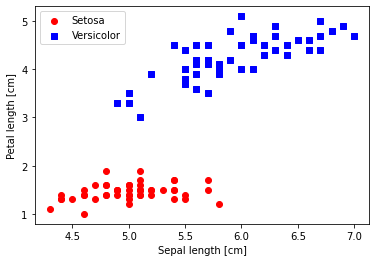

In [6]:
plt.scatter(X[:50, 0], X[:50, 1],
...             color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
...             color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

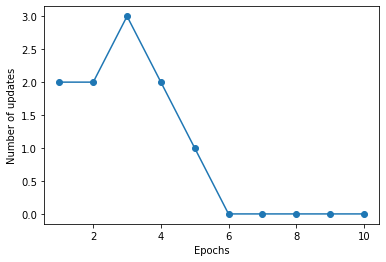

In [7]:
>>> ppn = Perceptron(eta=0.1, n_iter=10)
>>> ppn.fit(X, y)
>>> plt.plot(range(1, len(ppn.errors_) + 1),
...          ppn.errors_, marker='o')
>>> plt.xlabel('Epochs')
>>> plt.ylabel('Number of updates')
>>> plt.show()

In [8]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

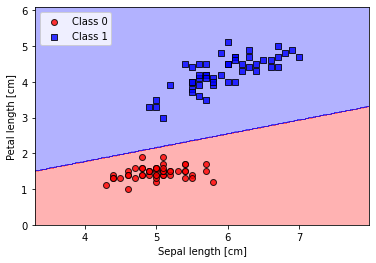

In [9]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [18]:
td = pd.read_csv("train.csv")
te_d = pd.read_csv("test.csv")

In [106]:
td.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [51]:
X_alive = td[td["Survived"]==1]
X_dead = td[td["Survived"]==0]


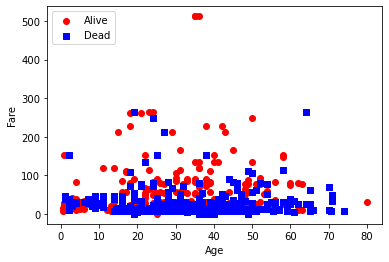

In [57]:
plt.scatter(X_alive["Age"], X_alive["Fare"],
            color='red', marker='o', label='Alive')
plt.scatter(X_dead["Age"], X_dead["Fare"],
             color='blue', marker='s', label='Dead')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(loc='upper left')
plt.show()


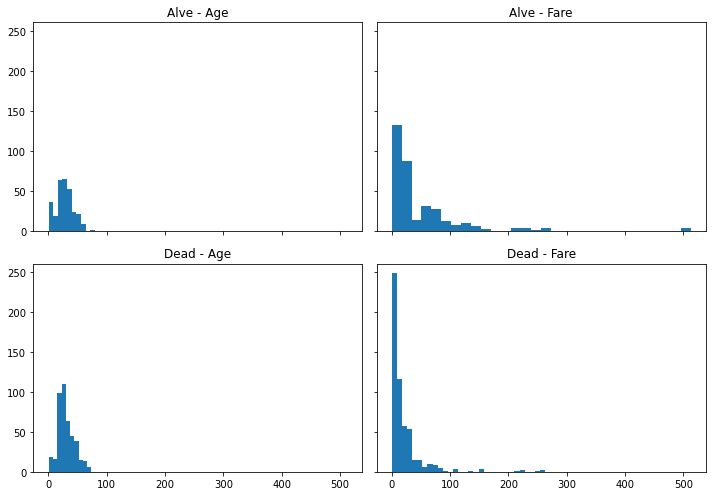

In [78]:
figure,axis = plt.subplots(2,2, sharey=True, sharex=True, figsize=(10,7))
plt.sca(axis[0,0])
plt.title("Alve - Age")
plt.hist(X_alive["Age"])
plt.sca(axis[0,1])
plt.hist(X_alive["Fare"], bins=30)
plt.title("Alve - Fare")
plt.sca(axis[1,0])
plt.hist(X_dead["Age"])
plt.title("Dead - Age")
plt.sca(axis[1,1])
plt.hist(X_dead["Fare"], bins=30)
plt.title("Dead - Fare")
plt.tight_layout()


In [134]:
y_for_fit = td["Survived"][:100].values.astype(np.uint)
X_for_fit = td[["Age", "Fare"]][:100].values



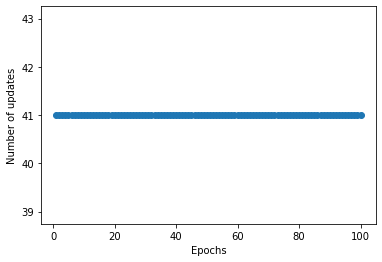

In [135]:
ppn_t = Perceptron(eta=0.01, n_iter=100)
ppn_t.fit(X_for_fit, y_for_fit)
plt.plot(range(1, len(ppn_t.errors_) + 1),
          ppn_t.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [136]:
sum(y_for_fit)

41.0

In [137]:
#Perceptron always says that a person is dead, need to find a better model!
